In [1]:
pip install lingam

In [2]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

import pandas as pd

df = pd.read_csv('C:/Users/ACER/Documents/TCDF-master/TCDF-master/data/Finance/manyinputs_returns30007000_header.csv')
print(df.head())
df.columns

['1.26.4', '2.1.4', '0.20.3', '1.9.0']
         S0        S1        S2        S3        S4        S5        S6  \
0  0.129999  0.991586  0.490534  1.030064  0.444978  1.208354  0.827543   
1  0.117729 -0.303972 -1.082923 -0.695533 -0.071504 -0.692810  0.102175   
2 -0.990932 -1.090502 -0.730285 -0.278989  0.345468 -0.935047 -0.460561   
3  1.940631  2.009416  1.683663  1.134586  1.794349  1.398274 -0.106631   
4  0.788248  0.093302 -0.032045  0.589187  0.616736  0.390370  0.965328   

         S7        S8        S9  ...       S15       S16       S17       S18  \
0  1.338010  0.759437  0.541619  ... -0.089528  0.507956  0.988139  0.987901   
1 -0.669950 -0.587785 -0.168711  ... -0.532579 -0.594185 -0.396401 -0.735928   
2 -0.421315  0.100106 -0.831737  ... -0.572841 -0.885619 -0.508891 -0.243055   
3  1.671531  1.490054  2.175950  ...  1.880062  1.461646  1.817153  1.704725   
4  0.542184 -0.203809  1.290336  ... -0.238918  0.637504  0.212562  0.933164   

        S19       S20       S

Index(['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22', 'S23', 'S24'],
      dtype='object')

In [3]:
model = lingam.VARLiNGAM()
model.fit(df)

In [4]:
model.causal_order_

[4,
 3,
 0,
 1,
 21,
 2,
 11,
 24,
 8,
 22,
 15,
 17,
 19,
 13,
 10,
 6,
 5,
 7,
 14,
 23,
 20,
 18,
 12,
 16,
 9]

In [5]:
# B0
model.adjacency_matrices_[0]

array([[ 0.   ,  0.   ,  0.   ,  0.606,  0.695,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.306,  0.   ,  0.   ,  0.339,  0.362,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.168,  0.191,  0.   ,  0.2  ,  0.275,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.071,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.821,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0. 

In [6]:
# B1
model.adjacency_matrices_[1]

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.035,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.1  ,  0.   ,  0.   , -0.075,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.034,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   , -0.03 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.057,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.043,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.046,  0.   ,  0.057,  0.   ,  0.   ,  0. 

In [9]:
model.residuals_

array([[ 0.041, -0.425, -1.107, ..., -0.772, -0.359, -0.479],
       [-0.658, -0.835, -0.514, ...,  0.006,  0.498, -0.363],
       [ 2.068,  2.075,  1.672, ...,  1.403,  2.1  ,  1.459],
       ...,
       [ 0.046,  0.651,  0.271, ...,  0.209,  0.85 ,  0.381],
       [-0.702, -1.165, -1.264, ..., -1.462, -1.026, -1.38 ],
       [-0.397, -0.391, -0.042, ...,  0.519,  0.576,  0.101]])

In [10]:
dlingam = lingam.DirectLiNGAM()
dlingam.fit(model.residuals_)
dlingam.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  0.602,  0.702,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.305,  0.   ,  0.   ,  0.341,  0.364,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.166,  0.19 ,  0.   ,  0.197,  0.274,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.071,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.821,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0. 

In [11]:
true_adj = model.adjacency_matrices_[0]
inferred_adj = model.adjacency_matrices_[1]

In [12]:
from sklearn.metrics import confusion_matrix
# Function to compute SHD
def compute_shd(true_graph, estimated_graph):
    added_edges = np.sum((estimated_graph - true_graph) == 1)
    removed_edges = np.sum((estimated_graph - true_graph) == -1)
    return added_edges + removed_edges

# Function to compute SID
def compute_sid(true_graph, estimated_graph):
    true_edges = (true_graph != 0).astype(int)
    estimated_edges = (estimated_graph != 0).astype(int)
    return np.sum(np.abs(true_edges - estimated_edges))

# Function to compute FDR
def compute_fdr(true_graph, estimated_graph):
    tp = np.sum((true_graph == 1) & (estimated_graph == 1))  # True Positives
    fp = np.sum((true_graph == 0) & (estimated_graph == 1))  # False Positives
    return fp / (tp + fp) if (tp + fp) > 0 else 0

# Function to compute MCC
def compute_mcc(true_graph, estimated_graph):
    # Flatten the matrices for binary classification
    y_true = (true_graph != 0).flatten()
    y_pred = (estimated_graph != 0).flatten()
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0
    return mcc

In [13]:
shd = compute_shd(true_adj, inferred_adj)
sid = compute_sid(true_adj, inferred_adj)
fdr = compute_fdr(true_adj, inferred_adj)
mcc = compute_mcc(true_adj, inferred_adj)

# Print results
print(f"SHD: {shd}")
print(f"SID: {sid}")
print(f"FDR: {fdr:.3f}")
print(f"MCC: {mcc:.3f}")

SHD: 0
SID: 248
FDR: 0.000
MCC: -0.032


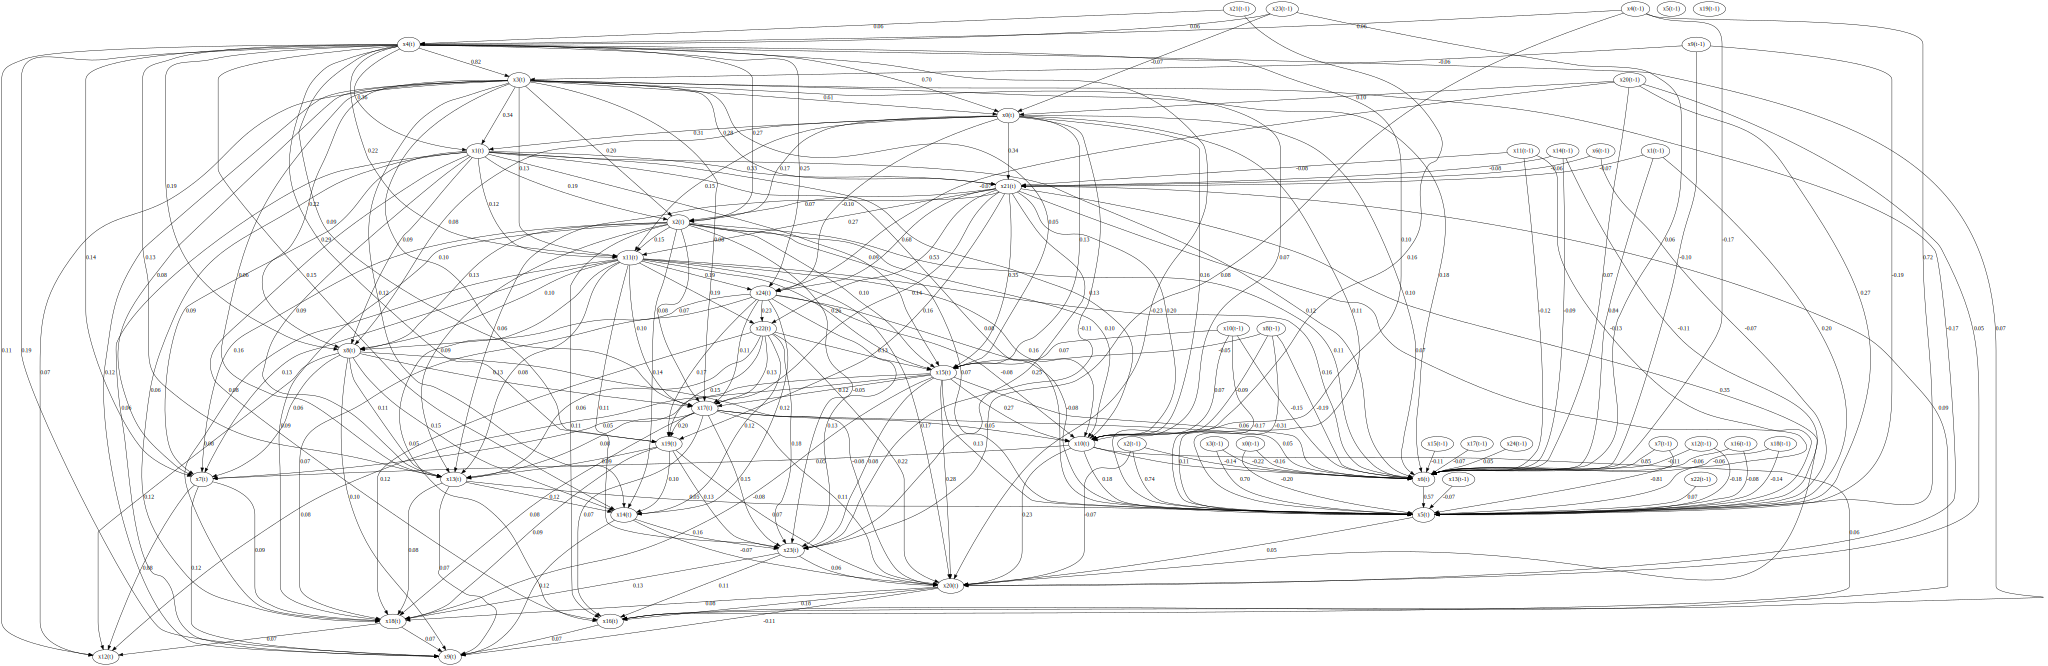

In [14]:
labels = ['x' + str(i) + '(t)' for i in range(25)] + ['x' + str(i) + '(t-1)' for i in range(25)]
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

In [ ]:
p_values = model.get_error_independence_p_values()
print(p_values)

In [ ]:
model = lingam.VARLiNGAM()
result = model.bootstrap(df, n_sampling=100)

In [15]:
from sklearn.linear_model import LinearRegression

target = 0
features = [i for i in range(df.shape[1]) if i != target]
reg = LinearRegression()

reg.fit(df.iloc[:, features], df.iloc[:, target])

LinearRegression()

In [22]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

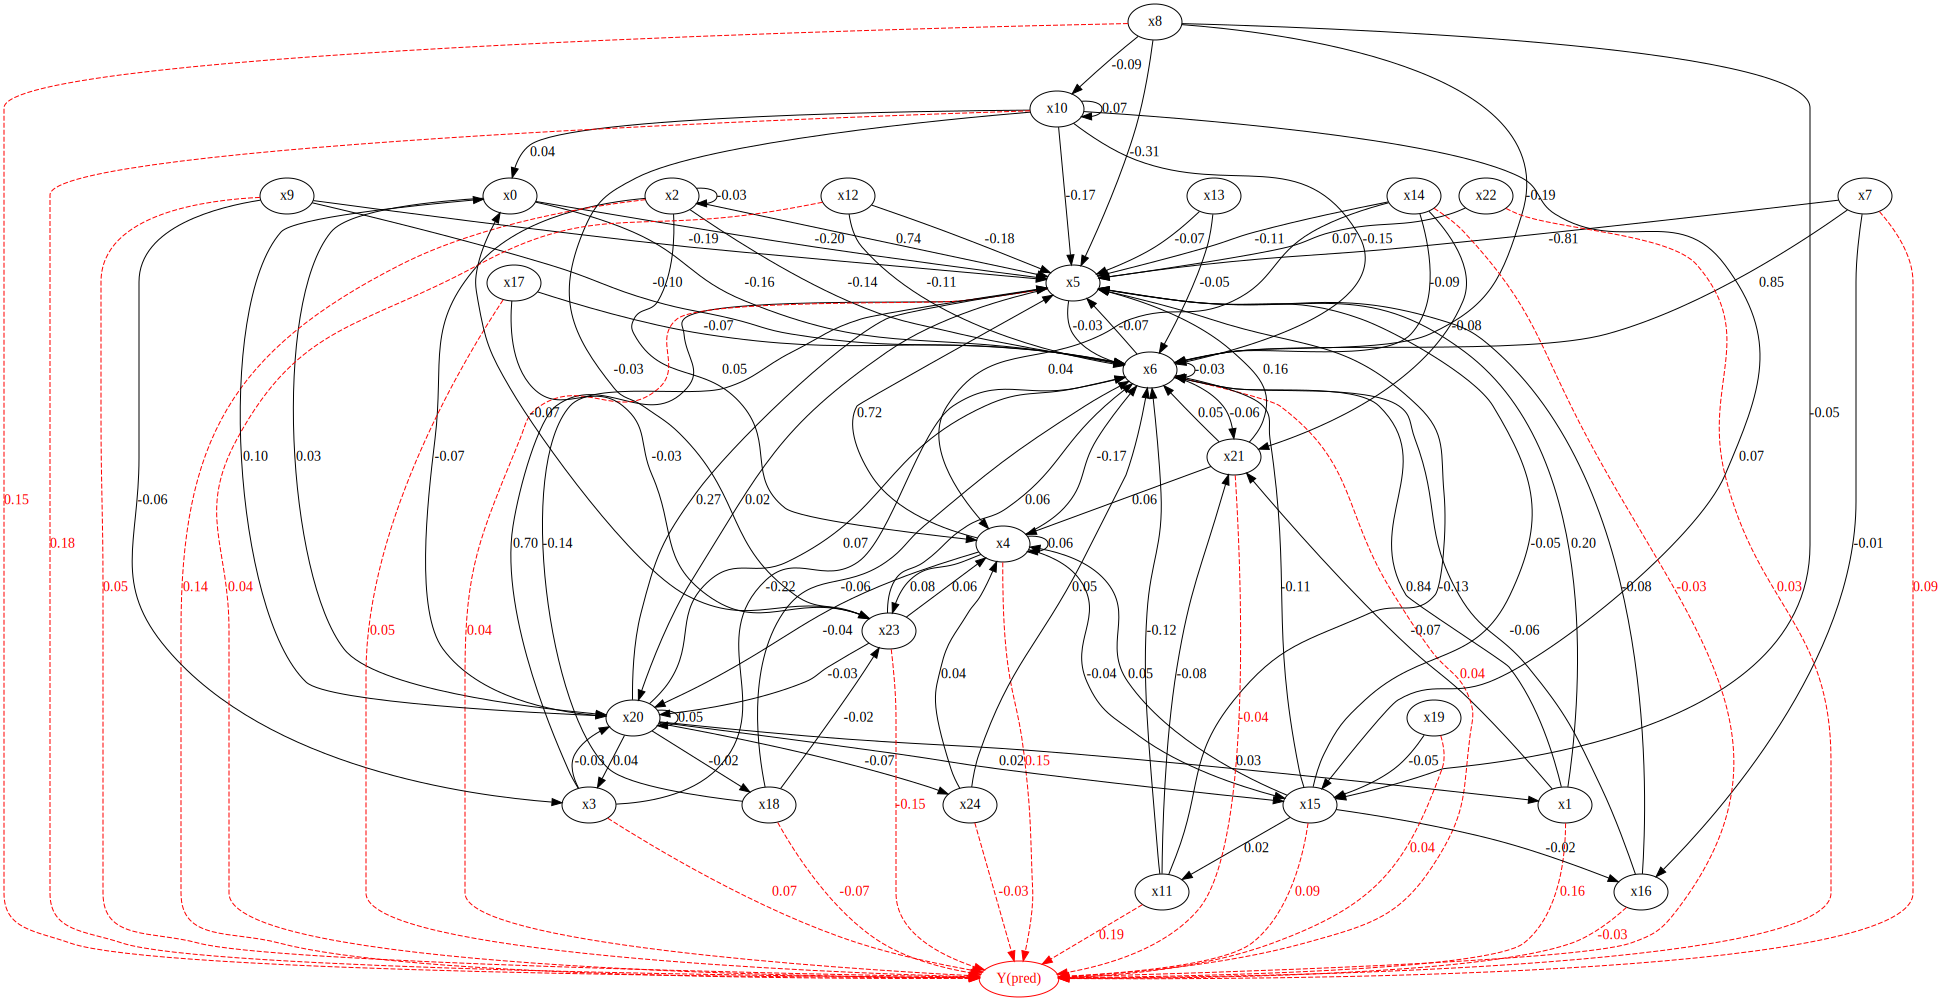

In [23]:
make_dot(model.adjacency_matrices_[1], prediction_feature_indices=features, prediction_coefs=reg.coef_)

In [28]:
lingam.utils.evaluate_model_fit(model.adjacency_matrices_[1], df)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,308,308,115647.892389,0.0,151862.422466,0.238954,0.238469,0.238469,0.238469,0.238954,0.306012,-23.823946,83.174898,28.911973
